# Thermal Exploration using TidalPy
In this notebook we will see how we can use TidalPy's object oriented approach to build a layered planet. We will then apply different temperatures to its mantle layer and see how its physical properties change.

### Build the Planet
For this example we will build a simple version of Io. We will be using the pre-built TidalPy configuration for "io_simple"; its configurations will be printed below.

In [1]:
from pprint import pprint
from TidalPy import build_world
io = build_world('io_simple')
pprint(io.Mantle.rheology.partial_melting_model.config)

{'TidalPy_Vers': '0.2.1.dev4',
 'crit_melt_frac': 0.5,
 'crit_melt_frac_width': 0.05,
 'fs_shear_power_phase': 40.6,
 'fs_shear_power_slope': 82000.0,
 'fs_visc_power_phase': 1.0,
 'fs_visc_power_slope': 27000.0,
 'hn_shear_falloff_slope': 700.0,
 'hn_shear_param_1': 40000.0,
 'hn_shear_param_2': 25.0,
 'hn_visc_slope_1': 13.5,
 'hn_visc_slope_2': 370.0,
 'liquid_shear': 1e-05,
 'liquidus': 2000.0,
 'model': 'henning',
 'pyclass': 'PartialMelt',
 'pyname': 'PartialMelt(L=Mantle)',
 'solidus': 1600.0}


### Plot the Planet's Interior Structure
Remember this is just a simple version of Io (no density as function of pressure)

In [ ]:
io.paint()

### Set the Mantle's Temperature and Plot its Viscoelastic Properties

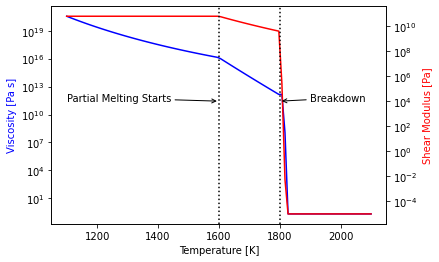

In [2]:
import numpy as np
import matplotlib.pyplot as plt
temperature = np.linspace(1100., 2100., 100)
io.Mantle.set_state(temperature=temperature)

# Plot the results
fig, ax = plt.subplots()
ax.set(xlabel='Temperature [K]', ylabel='Viscosity [Pa s]', yscale='log')
ax.yaxis.label.set_color('b')
ax_2 = ax.twinx()
ax_2.set(yscale='log', ylabel='Shear Modulus [Pa]')
ax_2.yaxis.label.set_color('r')
ax.plot(temperature, io.Mantle.viscosity, c='b')
ax_2.plot(temperature, io.Mantle.shear_modulus, c='r')

# Add line where partial melting starts
ax_2.axvline(x=1600., ls=':', c='k')
ax_2.annotate('Partial Melting Starts', (1600., 1.e4), (1100, 1.e4), arrowprops={'arrowstyle':'->'})
ax_2.axvline(x=1800., ls=':', c='k')
ax_2.annotate('Breakdown', (1800., 1.e4), (1900, 1.e4), arrowprops={'arrowstyle':'->'})
plt.show()
